# EC2202 Graphs (2)

**Disclaimer.**
This code examples are based on 
1. [LeetCode](https://leetcode.com/)
2. [GeeksForGeeks](https://practice.geeksforgeeks.org/)
3. Coding Interviews

In [ ]:
import doctest

## Disjoint Sets

### 'ppp' exercise

There are n people in a social group labeled from 0 to n - 1. You are given an array logs where logs[i] = [timestamp_i, x_i, y_i] indicates that x_i and y_i will be friends at the time timestamp_i.

Friendship is symmetric. That means if a is friends with b, then b is friends with a. Also, person a is acquainted with a person b if a is friends with b, or a is a friend of someone acquainted with b.

Return the earliest time for which every person became acquainted with every other person. If there is no such earliest time, return -1.

In [ ]:
def earliest_friends(logs, n):
  """
  >>> logs = [
  ...    [20190101,0,1],[20190104,3,4],[20190107,2,3],[20190211,1,5],
  ...    [20190224,2,4],[20190301,0,3],[20190312,1,2],[20190322,4,5]
  ...  ]
  >>> n = 6
  >>> earliest_friends(logs, n)
  20190301
  >>> logs = [[0,2,0],[1,0,1],[3,0,3],[4,1,2],[7,3,1]]
  >>> n = 4
  >>> earliest_friends(logs, n)
  3
  """
  # In order to ensure that we find the _earliest_ moment,
  # first of all we need to sort the events in chronological order.
  logs.sort(key = lambda x: x[0])

  ds = DisjointSets(n)
  
  # Initially, we treat each individual as a separate group.
  group_count = n

  # We merge the groups along the way.
  for timestamp, friend_a, friend_b in logs:
    if not ds.connected(friend_a, friend_b):
      ds.union(friend_a, friend_b)
      group_count -= 1

    # The moment when all individuals are connected to each other.
    if group_count == 1:
      return timestamp

  # There are still more than one groups left,
  # i.e. not everyone is connected.
  return -1

## Graph traversals

### Depth fisrt search (DFS: 깊이 우선 탐색)
1. Recursion
2. Iteration (using Stack)

In [ ]:
# G: graph, v: starting vertex
# visited: to track whether we visited a vertex; initialized as False
#   - visited = [ False ] * n
# G[v]: returns adjacent vertices of v
def dfs_recursion(G, v):
  visited[v] = True
  visit(v)  # do something useful
  for w in G[v]:  # G[v] returns the neighbors of v
    if not visited[w]:
      dfs_recursion(G, w)

In [ ]:
# G: graph, S: stack, v: starting vertex
def dfs_iteration(stack, v):
  visited = []
  stack = [v]
  while stack:
    v = stack.pop()
    if v not in visited:
      visited.append(v)
      visit(v)
      stack.extend(G[v] - set(visited))

### Breadth first search (BFS: 너비 우선 탐색)
1. using Queue

In [ ]:
# G: graph, Q: queue, v: starting vertex
def bfs(Q, v):
  Q.append(v)
  visited[v] = True
  visit(v)
  while Q:
    v = Q.pop(0)
    for w in G[v]:
      if not visited[w]:
        Q.append(w)
        visited[w] = True
        visit(w)

### 'ppp' exercise (1)

There is a graph with n vertices, where each vertex is labeled from 0 to n - 1 (inclusive). The edges in the graph are represented as a 2D integer array edges, where each edges[i] = [u_i, v_i] denotes an edge between vertex u_i and vertex v_i. Every vertex pair is connected by at most one edge, and no vertex has an edge to itself.

You want to determine if there is a valid path that exists from vertex source to vertex destination.

Given edges and the integers n, source, and destination, return true if there is a valid path from source to destination, or false otherwise.

In [ ]:
def valid_path(n, edges, source, destination):
  '''
  >>> n = 6
  >>> edges = [[0,1],[0,2],[3,5],[5,4],[4,3]]
  >>> source = 0
  >>> destination = 5
  >>> valid_path(n, edges, source, destination)
  False
  >>> n = 3
  >>> edges = [[0,1],[1,2],[2,0]]
  >>> source = 0
  >>> destination = 2
  >>> valid_path(n, edges, source, destination)
  True
  '''
  # solution 1. DFS
  adjacency_list = [[] for _ in range(n)]
  
  for a, b in edges:
    adjacency_list[a].append(b)
    adjacency_list[b].append(a)
  
  stack = [source]
  visited = set()  # visited = [ False ] * n
  
  while stack:
    # Get the current node.
    node = stack.pop()
    
    # Check if we have reached the target node.
    if node == destination:
      return True
    
    # Check if we've already visited this node.
    if node in visited:
      continue
    
    visited.add(node)
    
    # Add all neighbors to the stack.
    for neighbor in adjacency_list[node]:
      stack.append(neighbor)
  
  # Our stack is empty and we did not reach the destination node.
  return False

  # solution 2. BFS
  adjacency_list = [[] for _ in range(n)]
  for a, b in edges:
    adjacency_list[a].append(b)
    adjacency_list[b].append(a)
  
  import collections
  queue = collections.deque([source])  # q = [ source ] => q.pop(0)
  visited = set([source])
  
  while queue:
    # Get the current node.
    node = queue.popleft()
    
    # Check if we have reached the target node.
    if node == destination:
      return True
    
    # Add all neighbors to the queue.
    for neighbor in adjacency_list[node]:
      # Check if neighbor has been added to the queue before.
      if neighbor not in visited:
        visited.add(neighbor)
        queue.append(neighbor)
  
  # Our queue is empty and we did not reach the destination node.
  return False

### 'ppp' exercise (2)

Given an n x n binary matrix grid, return the length of the shortest clear path in the matrix. If there is no clear path, return -1.

A clear path in a binary matrix is a path from the top-left cell (i.e., (0, 0)) to the bottom-right cell (i.e., (n - 1, n - 1)) such that:

- All the visited cells of the path are 0.
- All the adjacent cells of the path are 8-directionally connected (i.e., they are different and they share an edge or a corner).

The length of a clear path is the number of visited cells of this path.

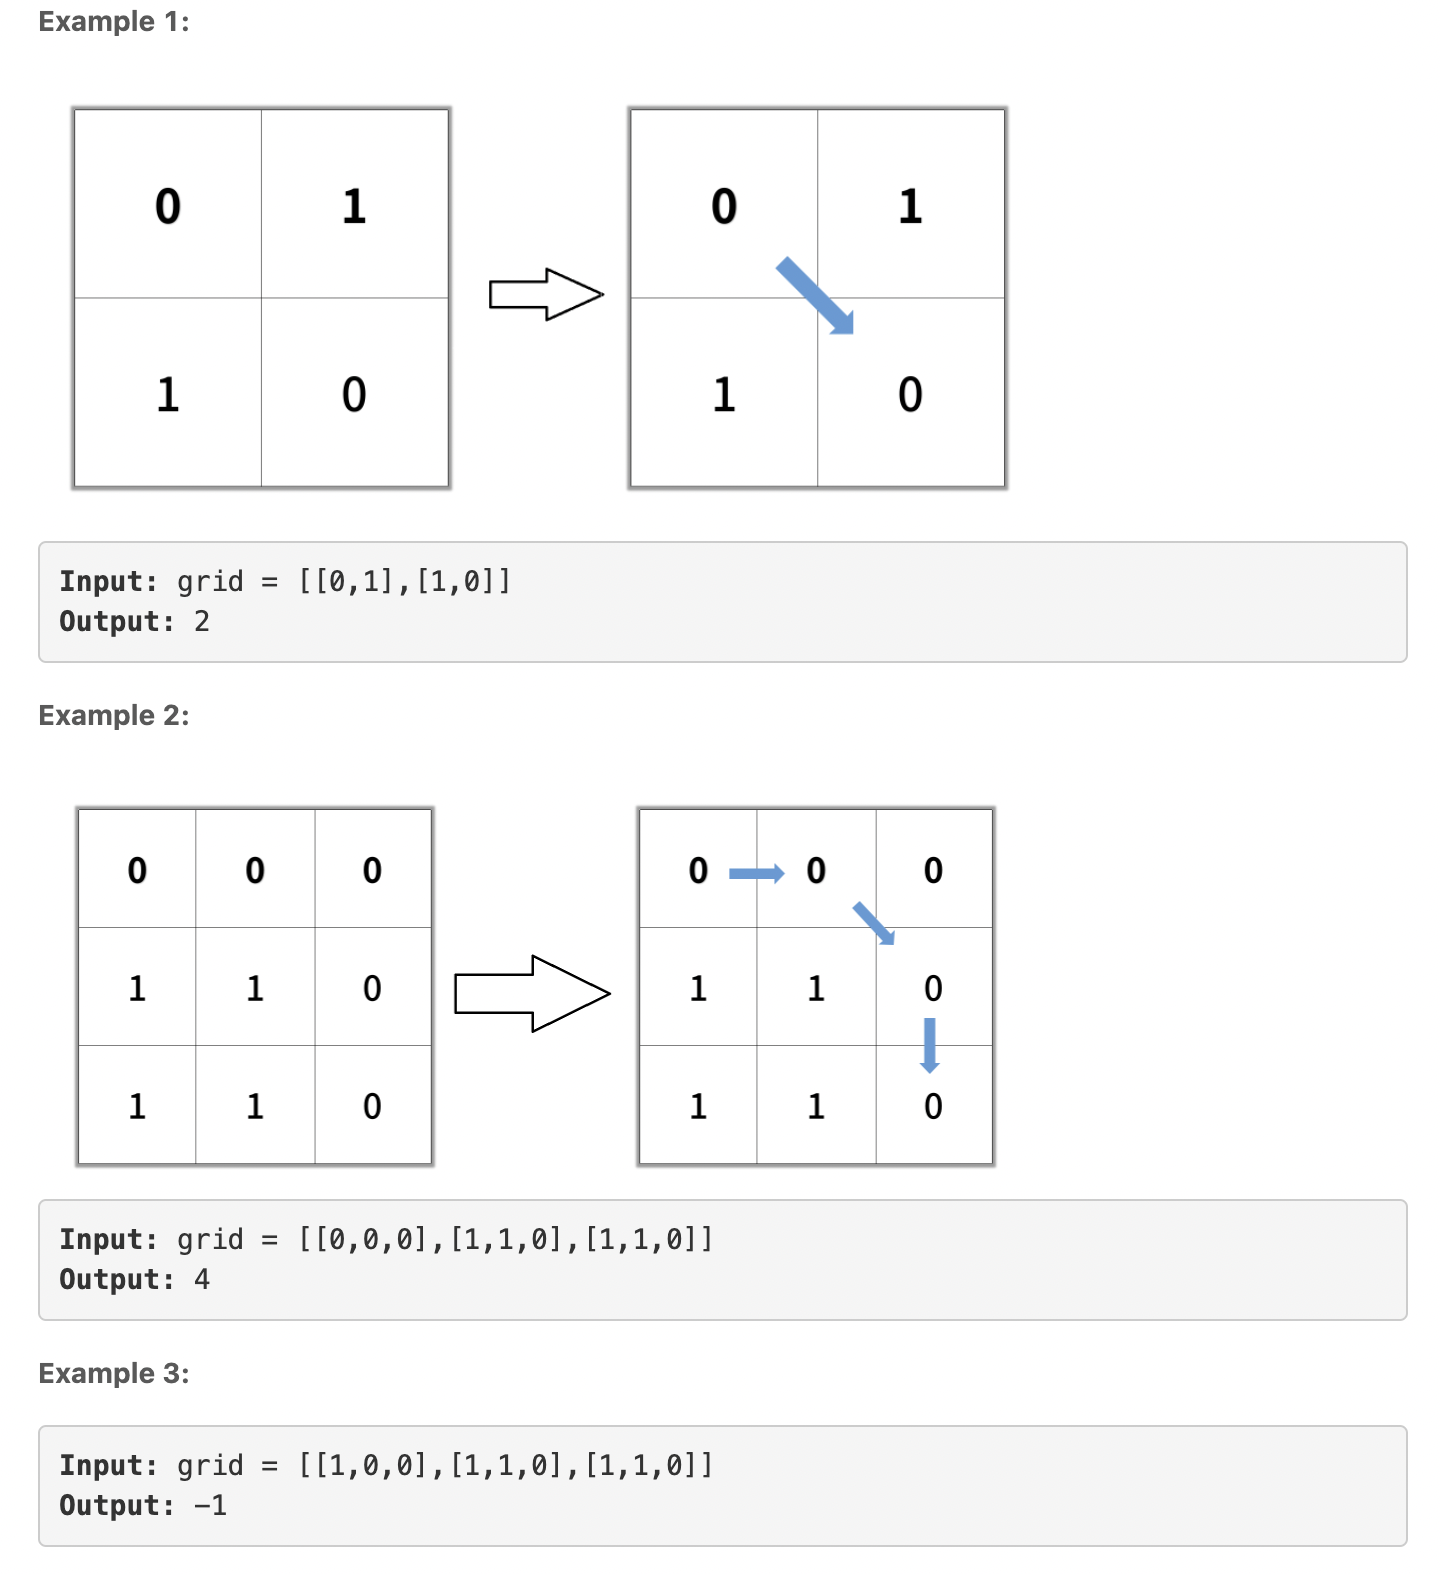

In [ ]:
def shortest_path(grid):
  # first determine which one to use: dfs or bfs?
  visited = [[False for i in range(len(grid[0]))] for j in range(len(grid))]
  queue = deque()
  queue.append((0, 0, 1))
  dx, dy = [1, -1, 0, 0, 1, 1, -1, -1], [0, 0, 1, -1, -1, 1, -1, 1]

  while queue:
    x, y, d = queue.popleft()

    if grid[x][y] == 1:
      continue
    
    if x == len(grid) - 1 and y == len(grid[0]) - 1:
      return d
    
    visited[x][y] = True
    for cx, cy in zip(dx, dy):
      nx = x + cx
      ny = y + cy
      if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]):
        if grid[nx][ny] == 0 and not visited[nx][ny]:
          queue.append((nx, ny, d + 1))
  return -1

## Minimum spanning trees

### Kruskal's algorithm

In [ ]:
def mst_kruskal(G):  # G: (vertex_a, vertex_b, weight)
  mst = []
  ds = DisjointSets(N)
  G.sort(key=lambda t: t[2])  # ascending order
  mst_cost = 0
  while len(mst) < N - 1:
    u, v, val = G.pop(0)
    if not ds.connected(u, v):
      ds.union(u, v)
      mst.append((u, v))
      mst_cost += val

#### 'ppp' exercise

You are given an array points representing integer coordinates of some points on a 2D-plane, where `points[i] = [xi, yi]`.

The cost of connecting two points `[xi, yi]` and `[xj, yj]` is the manhattan distance between them: `|xi - xj| + |yi - yj|`, where `|val|` denotes the absolute value of `val`.

Return the minimum cost to make all points connected. All points are connected if there is exactly one simple path between any two points.

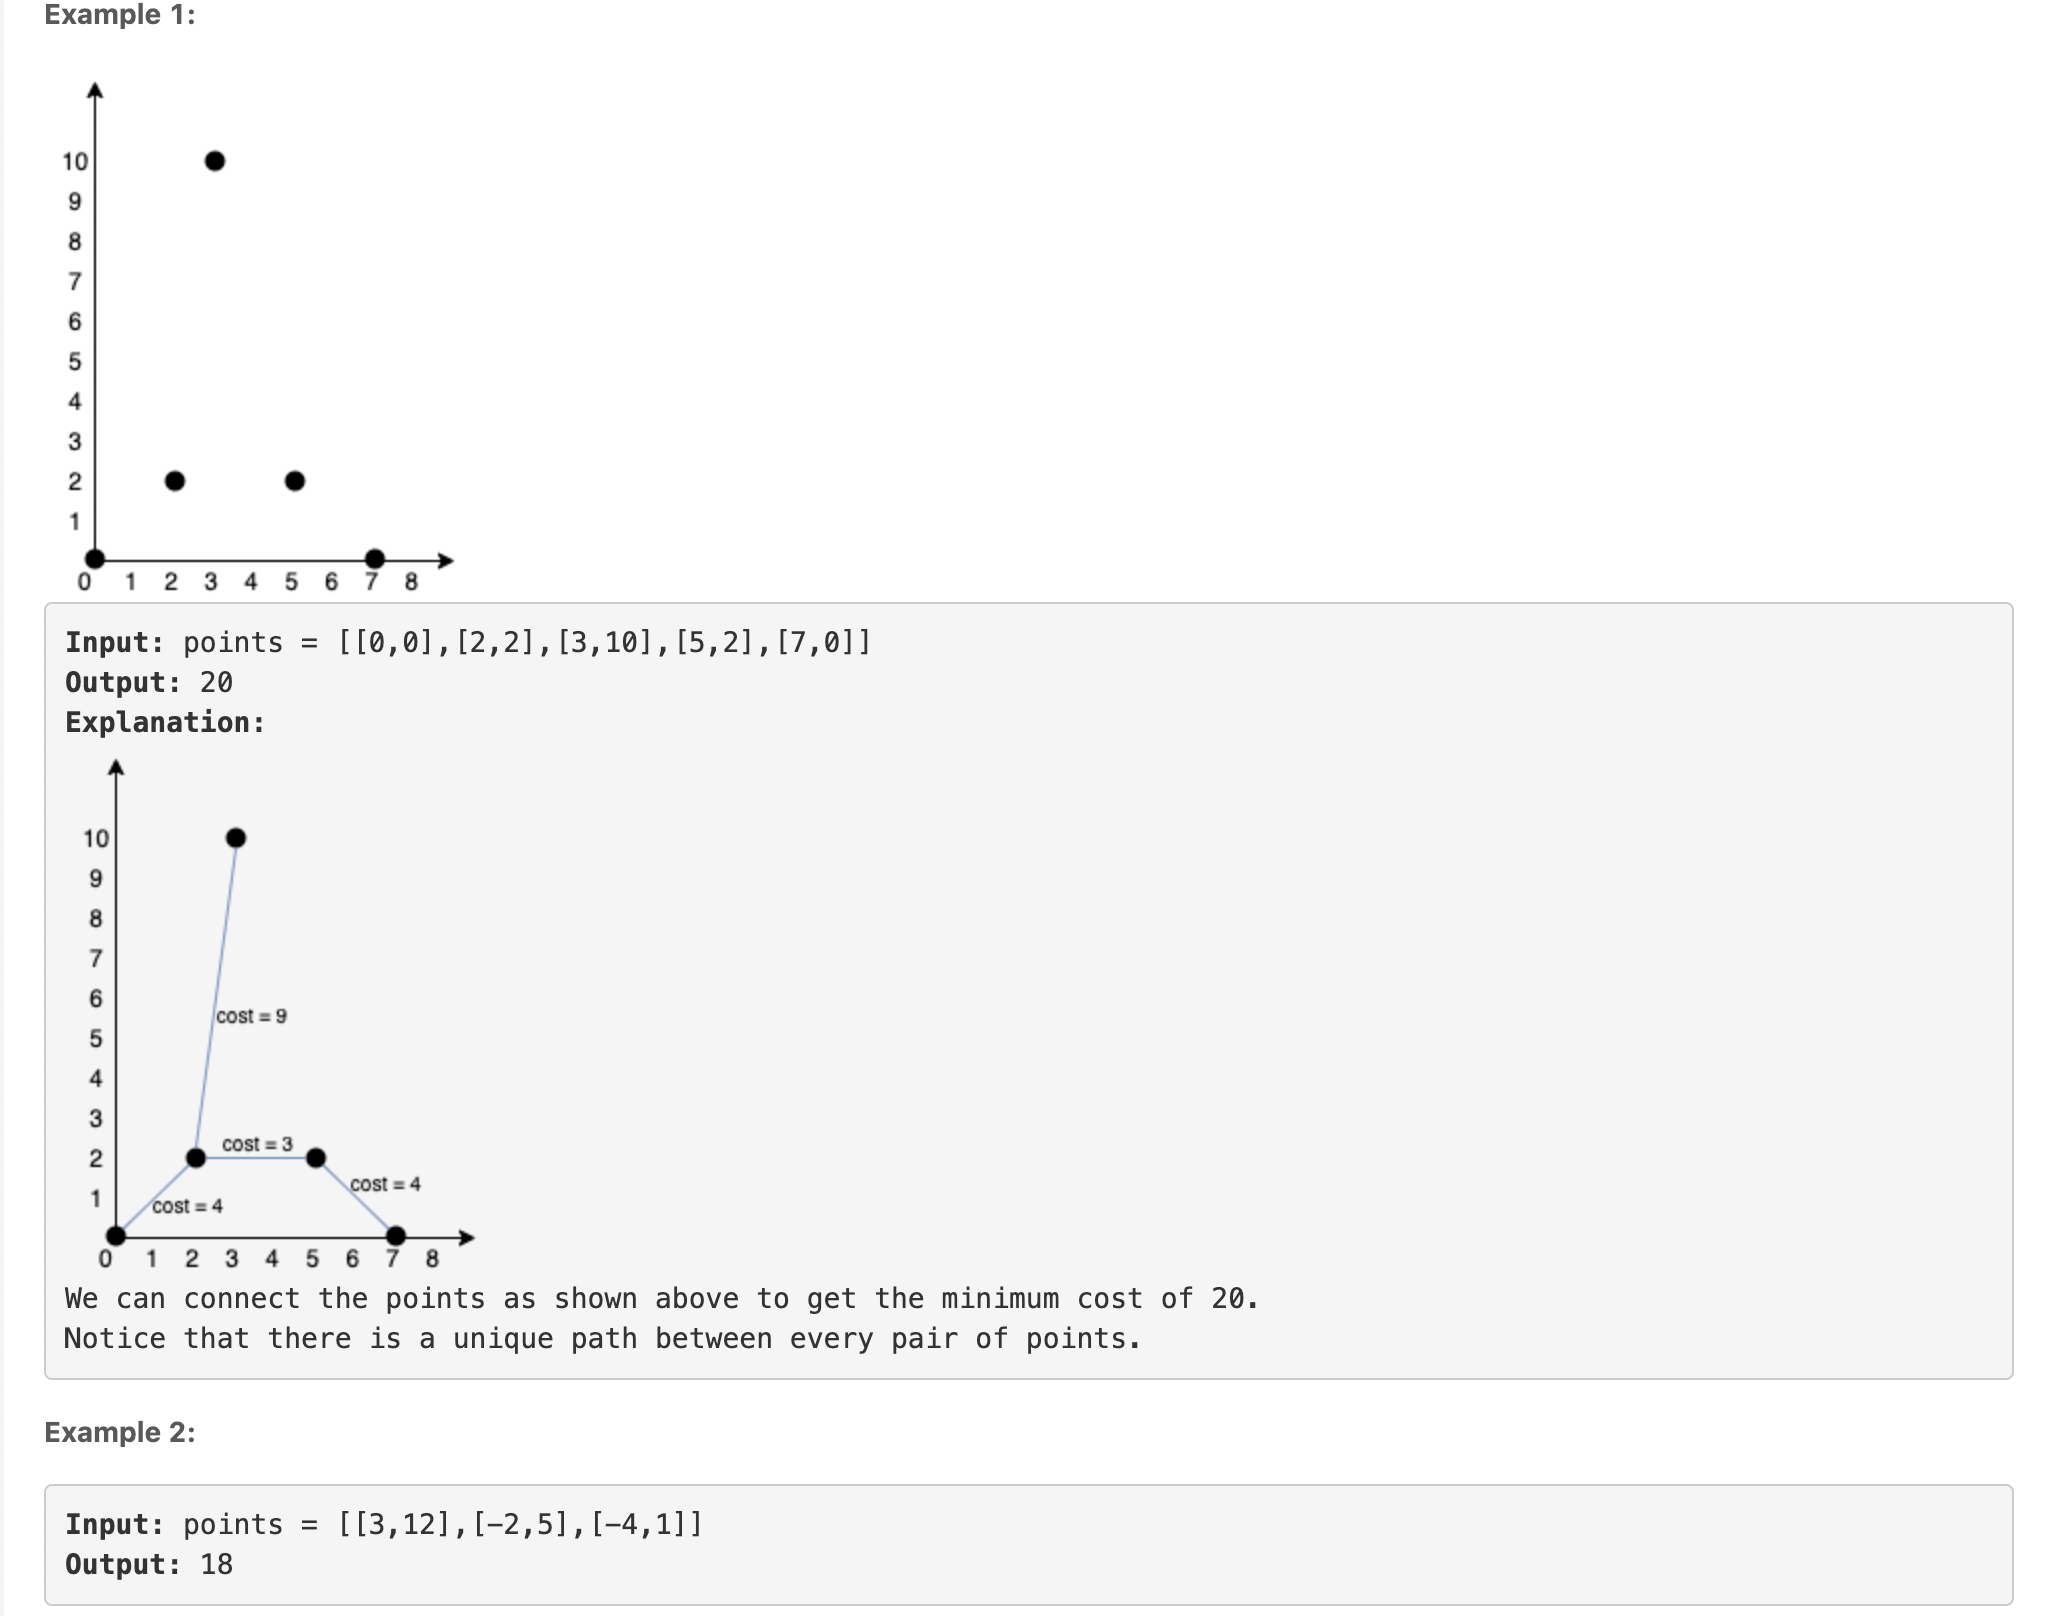

In [ ]:
def min_cost_connection(points):
  '''
  >>> min_cost_connection([[0,0],[2,2],[3,10],[5,2],[7,0]])
  20
  >>> min_cost_connection([[3,12],[-2,5],[-4,1]])
  18
  '''
  # ** hint 1 **
  #    Connect each pair of points with a weighted edge,
  #    the weight being the manhattan distance between those points.

  # ** hint 2 **
  #    The problem is now the cost of minimum spanning tree
  #    in graph with above edges.

  # ** hint 3 **
  #    Use the edge class provided to convert the problem
  #    as minimum spanning tree

  # ** hint 4 **
  #    Use the heap data structure to sort out the edges
  #    - heap.heapify(a_list_of_items)
  #    - heap.heappop(a_list_of_items)

class Edge:
  def __init__(self, point1, point2, cost):
    self.point1 = point1
    self.point2 = point2
    self.cost = cost

  def __lt__(self, other):
    return self.cost < other.cost